# Transformarea Isentropă

In [ ]:
!pip install ipympl

In [5]:
%matplotlib ipympl
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# informatia este luată de aici: 
# https://kapernikov.com/ipywidgets-with-matplotlib/
class Sines(widgets.HBox):
  def __init__(self):
    super().__init__()
    output = widgets.Output()

    self.x = np.linspace(0, 2*np.pi, 100)
    initial_color='FF00DD'

    with output:
      self.fig, self.ax = plt.subplots(constrained_layout=True, figsize=(6,4))
    
    self.line, = self.ax.plot(self.x, np.sin(self.x),'k-')

    self.fig.canvas.toolbar_position='bottom'
    self.ax.grid(True)

    int_slider = widgets.IntSlider(1, 0, 10, 1,description='frequency')
    #color_picker = widgets.ColorPicker(value=initial_color, description='pick a color')
    text_xlabel = widgets.Text(value='', description='xlabel', continuous_update=False)
    text_ylabel = widgets.Text(value='', description='ylabel', continuous_update=False)

    controls = widgets.VBox([int_slider,
                           # color_picker,
                           text_xlabel,
                           text_ylabel])
    int_slider.observe(self.update, 'value')
    #color_picker.observe(self.line_color, 'value')
    text_xlabel.observe(self.update_xlabel, 'value')
    text_ylabel.observe(self.update_ylabel, 'value')
    text_xlabel.value = 'x'
    text_ylabel.value = 'y'
    
    self.children=[controls, output]

  def update(self, change):
      """Draw line in plot"""
      self.line.set_ydata(np.sin(change.new * self.x))
      self.fig.canvas.draw()
 
  def line_color(self, change):
    self.line.set_color(change.new)
 
  def update_xlabel(self, change):
    self.ax.set_xlabel(change.new)
 
  def update_ylabel(self, change):
    self.ax.set_ylabel(change.new)


Sines(children=(VBox(children=(IntSlider(value=1, description='frequency', max=10), Text(value='x', continuous…

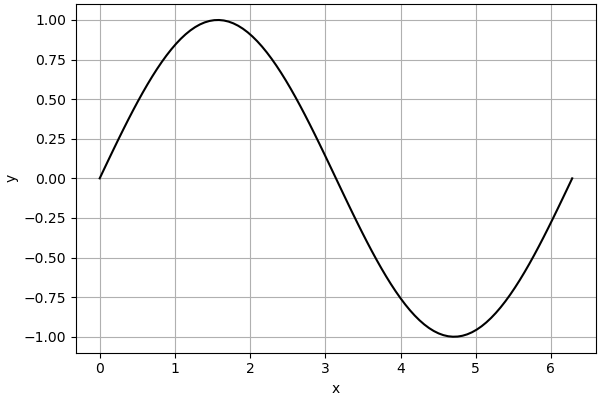

In [11]:
Sines()